In [205]:
# EDA 과정
# 적절한 머신러닝을 선택

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# 기본 iris 데이터셋 로드
from sklearn.datasets import load_iris

In [208]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [209]:
X = data.data
Y = data.target
iris_class = data.target_names
X.shape

(150, 4)

In [210]:
iris_column = data.feature_names

In [211]:
iris_column
# sepal length (cm) 꽃받침
# petal length (cm) 꽃잎

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [212]:
# 각 꽃잎의 평균길이와 꽃받침의 평균 길이
sum_sepal_length  = sum([iris[0] for iris in X])
sum_petal_length  = sum([iris[2] for iris in X])
sum_sepal_length, sum_petal_length

(876.5000000000002, 563.7000000000004)

In [213]:
mean_sepal_length  = round(np.mean([iris[0] for iris in X]),3)
mean_petal_length  = round(np.mean([iris[2] for iris in X]),3)
mean_sepal_length, mean_petal_length

(5.843, 3.758)

In [214]:
# 붓꽃의 품종별 특징
iris_class

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [215]:
X[0], Y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [216]:
setosa = X[Y == 0]
versicolor = X[Y == 1]
virginica = X[Y == 2]

In [217]:
plt.style.use('ggplot')   # R 에 있는 시각화 도구를 흉내내 서 좀더 깔끔하게 보여줌
setosa_len = len(setosa)
versicolor_len = len(versicolor)
virginica_len = len(virginica)

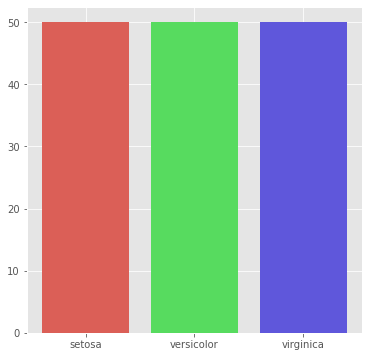

In [218]:
plt.figure(figsize=(6,6))
species_count = [setosa_len,versicolor_len,virginica_len]
color = sns.color_palette('hls',len(species_count))
plt.bar(iris_class,species_count,color=color)
plt.show()

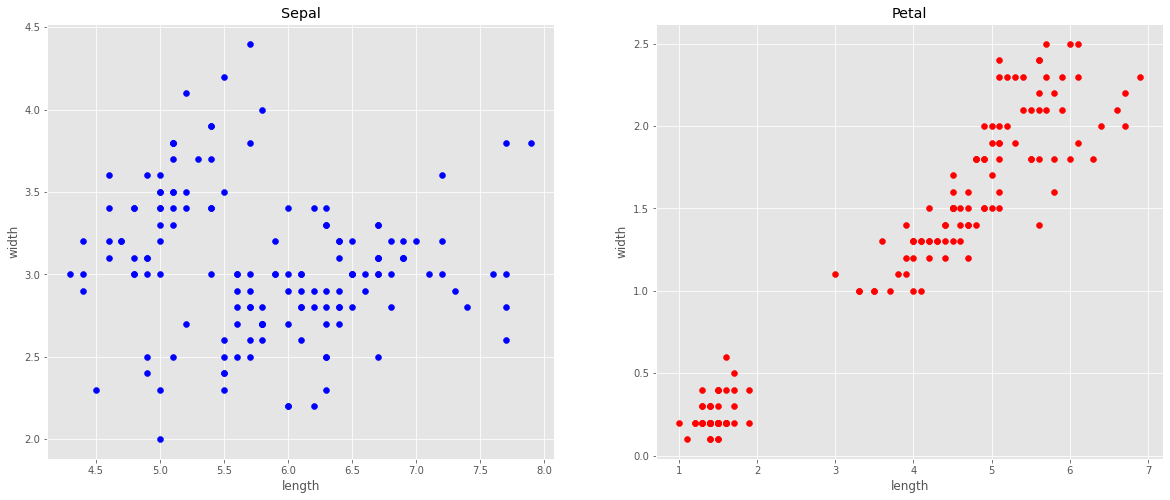

In [219]:
# scatter 길이와 너비의 상관관계
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter([iris[0] for iris in X],[iris[1] for iris in X], color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter([iris[2] for iris in X],[iris[3] for iris in X], color='r')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Petal')
plt.show()
# 꽃잎은 길이와 너비가 비례한다(상관관계가 있다) - 전체

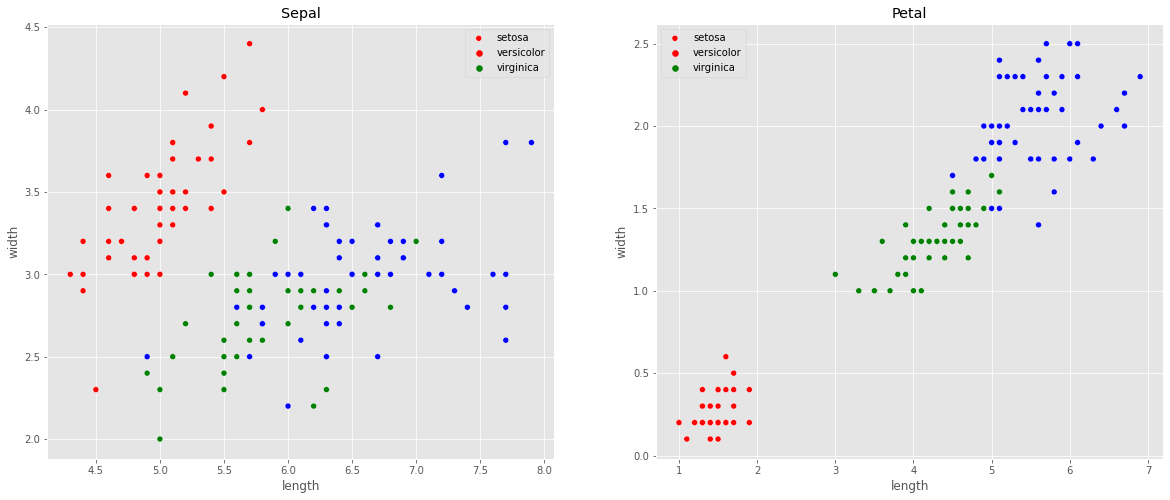

In [220]:
# 품종별로 Sepal, Petal의 관계를
plt.figure(figsize=(20,8))

color = ['r','g','b']

plt.subplot(1,2,1)
sns.scatterplot(x = [iris[0] for iris in X],y = [iris[1] for iris in X],hue=Y,palette=color)
plt.title('Sepal')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(iris_class)

plt.subplot(1,2,2)
sns.scatterplot(x = [iris[2] for iris in X],y = [iris[3] for iris in X],hue=Y,palette=color)
plt.title('Petal')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(iris_class)

plt.show()

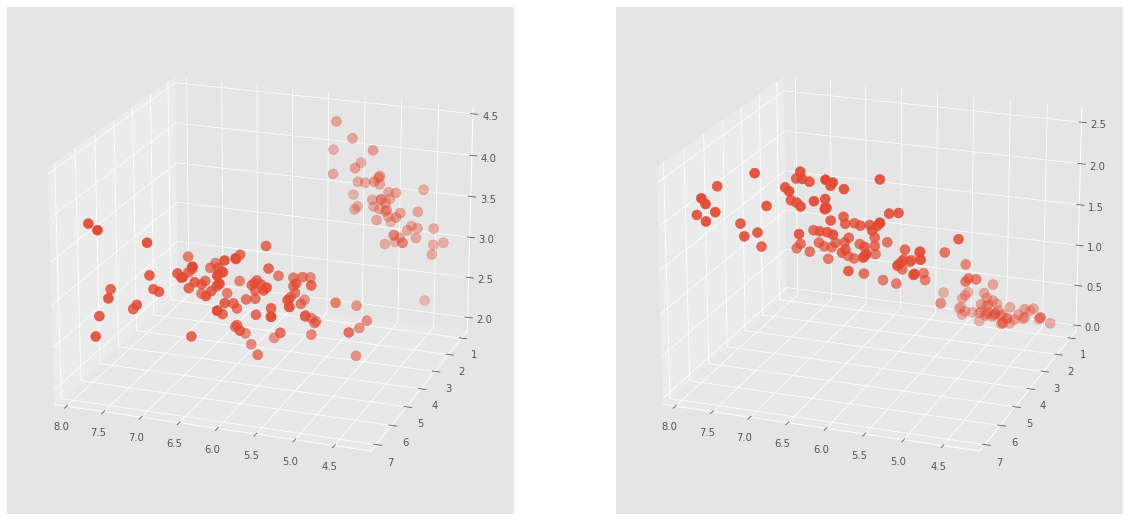

In [221]:
fig = plt.figure(figsize=(20,13))

ax = fig.add_subplot(1,2,1,projection = '3d')
ax.view_init(20,110)
ax.set_title('')
# 꽃받침의 길이, 꽃잎의 길이, 꽃받침의 너비
ax.scatter([iris[0] for iris in X],[iris[2] for iris in X],[iris[1] for iris in X],s=100)

ax = fig.add_subplot(1,2,2,projection = '3d')
ax.view_init(20,110)
ax.set_title('')
# 꽃받침의 길이, 꽃잎의 길이, 꽃잎의 너비
ax.scatter([iris[0] for iris in X],[iris[2] for iris in X],[iris[3] for iris in X],s=100)

plt.show()

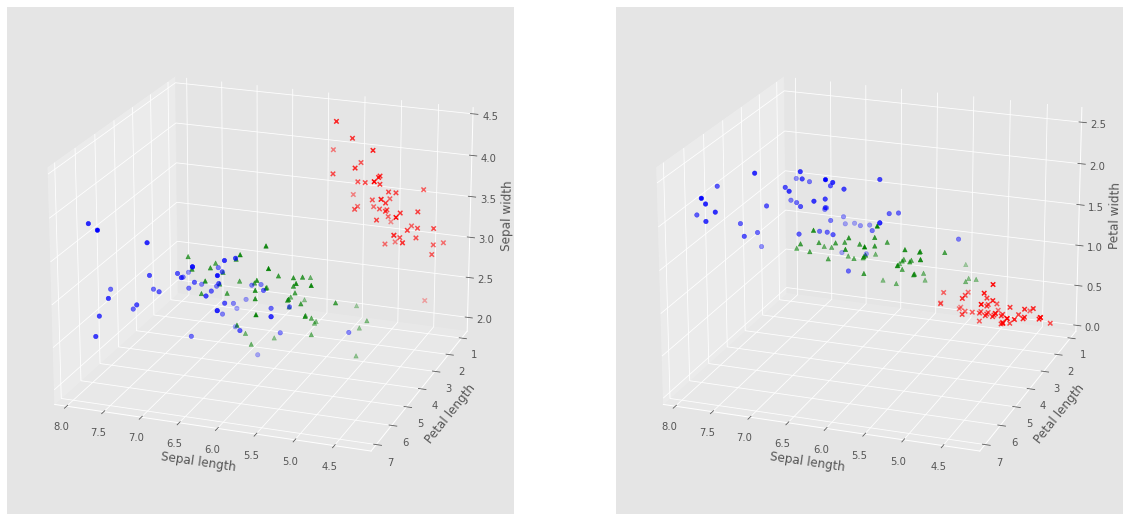

In [222]:
# setosa', 'versicolor', 'virginica
#0           1             2

setosa = X[Y==0]
versicolor = X[Y==1]
virginica = X[Y==2]



fig = plt.figure(figsize=(20,13))

ax = fig.add_subplot(1,2,1,projection = '3d')
ax.view_init(20,110)
ax.set_title('')
# 꽃받침의 길이, 꽃잎의 길이, 꽃받침의 너비
ax.scatter([iris[0] for iris in setosa],[iris[2] for iris in setosa],[iris[1] for iris in setosa],
          color='r',marker='x',label='setosa')
ax.scatter([iris[0] for iris in versicolor],[iris[2] for iris in versicolor],[iris[1] for iris in versicolor],
          color='g',marker='^',label='versicolor')
ax.scatter([iris[0] for iris in virginica],[iris[2] for iris in virginica],[iris[1] for iris in virginica],
          color='b',marker='o',label='virginica')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Sepal width')

ax = fig.add_subplot(1,2,2,projection = '3d')
ax.view_init(20,110)
ax.set_title('')
# 꽃받침의 길이, 꽃잎의 길이, 꽃잎의 너비
ax.scatter([iris[0] for iris in setosa],[iris[2] for iris in setosa],[iris[3] for iris in setosa],
          color='r',marker='x',label='setosa')
ax.scatter([iris[0] for iris in versicolor],[iris[2] for iris in versicolor],[iris[3] for iris in versicolor],
          color='g',marker='^',label='versicolor')
ax.scatter([iris[0] for iris in virginica],[iris[2] for iris in virginica],[iris[3] for iris in virginica],
          color='b',marker='o',label='virginica')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')


plt.show()

In [223]:
# 머신러닝

In [224]:
df = pd.DataFrame(X,columns=iris_column)
df['species'] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [225]:
# 상관관계  품종별 상관관계
# df['species'] == 0
df['species2'] = 'setosa'
# data.target_names

df[df.species == 1]['species2'] = 'versicolor'
df[df.species == 2]['species2'] = 'virginica'
df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_2500/2862842388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.species == 1]['species2'] = 'versicolor'
C:\Users\user\AppData\Local\Temp/ipykernel_2500/2862842388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.species == 2]['species2'] = 'virginica'


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species2
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [226]:

df.loc[df.species == 1,'species2'] = 'versicolor'
df.loc[df.species == 2,'species2'] = 'virginica'
np.unique( df.species2,return_counts=True)


(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [227]:
setosa_df = df[df.species2 == 'setosa']
np.unique( setosa_df.species2,return_counts=True)

(array(['setosa'], dtype=object), array([50], dtype=int64))

In [228]:
versicolor_df = df[df.species2 == 'versicolor']
np.unique( versicolor_df.species2,return_counts=True)

(array(['versicolor'], dtype=object), array([50], dtype=int64))

In [229]:
virginica_df = df[df.species2 == 'virginica']
np.unique( virginica_df.species2,return_counts=True)

(array(['virginica'], dtype=object), array([50], dtype=int64))

In [291]:
setosa_y = setosa_df.iloc[:,3]
setosa_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.742547,0.267176
sepal width (cm),0.742547,1.000000,0.177700
petal length (cm),0.267176,0.177700,1.000000


In [292]:
setosa_x = setosa_df.iloc[:,:3]

In [293]:
versicolor_y = versicolor_df.iloc[:,3]
versicolor_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.525911,0.754049
sepal width (cm),0.525911,1.000000,0.560522
petal length (cm),0.754049,0.560522,1.000000


In [294]:
versicolor_x = versicolor_df.iloc[:,:3]

In [295]:
virginica_y = virginica_df.iloc[:,3]
virginica_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.457228,0.864225
sepal width (cm),0.457228,1.000000,0.401045
petal length (cm),0.864225,0.401045,1.000000


In [296]:
virginica_x =  virginica_df.iloc[:,:3]

In [297]:
# 분석을 위해서 선형관계 존재하는 컬럼들을 모아서 학습

In [298]:
# 선형회귀, 랜덤포레스트
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [319]:
#setosa_df
def LrModel(x , y):    
#     ss = StandardScaler()
#     x =  ss.fit_transform(x) 
    
    x_train,x_target,y_train,y_target =  train_test_split(x,y,test_size=0.2, random_state=10)        
    
    lr = LinearRegression()
    lr.fit(np.array(x_train),y_train)
    return lr.score(np.array(x_target),y_target)

In [320]:
x = setosa_x
y = setosa_y
LrModel(x , y)

0.21903005129370512

In [321]:
x = versicolor_x
y = versicolor_y
LrModel(x,y)

0.7147497461545662

In [322]:
x = virginica_x
y = virginica_y
LrModel(x,y)

0.3146086331917578

In [323]:
def RFR_Regressor(x,y):    
#     ss = StandardScaler()
#     x =  ss.fit_transform(x) 
    
    x_train,x_target,y_train,y_target =  train_test_split(x,y,test_size=0.2, random_state=20)        
    
    rfr =  RandomForestRegressor(max_depth=1, criterion='absolute_error')
    rfr.fit(x_train,y_train)
    return rfr.score(x_target,y_target)


In [324]:
x = setosa_x
y = setosa_y
print(RFR_Regressor(x,y))
x = versicolor_x
y = versicolor_y
print(RFR_Regressor(x,y))
x = virginica_x
y = virginica_y
print(RFR_Regressor(x,y))

0.13084405940594002
-0.024673750000001826
-0.8881073113207492


In [339]:
from sklearn.linear_model import LogisticRegression
def Logistic_Regressor(x,y):    
    ss = StandardScaler()
    x =  ss.fit_transform(x) 
    
    x_train,x_target,y_train,y_target =  train_test_split(x,y,test_size=0.2, random_state=20)        
    
    model =  LogisticRegression()
    model.fit(x_train,[int(i) for i in y_train])
    return model.score(x_target,[int(i) for i in y_target])

In [340]:
x = setosa_x
y = setosa_y
print(Logistic_Regressor(x,y))
x = versicolor_x
y = versicolor_y
print(Logistic_Regressor(x,y))
x = virginica_x
y = virginica_y
print(Logistic_Regressor(x,y))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [338]:
x = virginica_x
y = virginica_y

ss = StandardScaler()
x =  ss.fit_transform(x) 

x_train,x_target,y_train,y_target =  train_test_split(x,y,test_size=0.2, random_state=20)        

model =  LogisticRegression()

model.fit(x_train, [int(i) for i in y_train])
model.score(x_target,[int(i) for i in y_target])

0.8